In [15]:
from pathlib import Path
from gtp.dataloading.tools import load_json
from collections import defaultdict

OUTPUT_DIR = Path("/local/scratch/carlyn.1/dna/training_output/deepnet_7_17/")

species = "erato"
color = "color_3"
wing = "forewings"

plot_data = defaultdict(list)
for chromosome in range(1, 22):
    exp_dir = OUTPUT_DIR / f"{species}_{wing}_{color}_chromosome_{chromosome}"
    baselines = load_json(exp_dir / "baselines.json")
    results = load_json(exp_dir / "results.json")
    
    plot_data["baseline_test_to_test_r2"].append(baselines["test_to_test"]["r2"])
    plot_data["baseline_train_to_test_r2"].append(baselines["train_to_test"]["r2"])
    plot_data["baseline_val_to_val_r2"].append(baselines["val_to_val"]["r2"])
    plot_data["baseline_train_to_val_r2"].append(baselines["train_to_val"]["r2"])
    plot_data["test_r2"].append(results["test"]["r2"])
    plot_data["val_r2"].append(results["val"]["r2"])
    

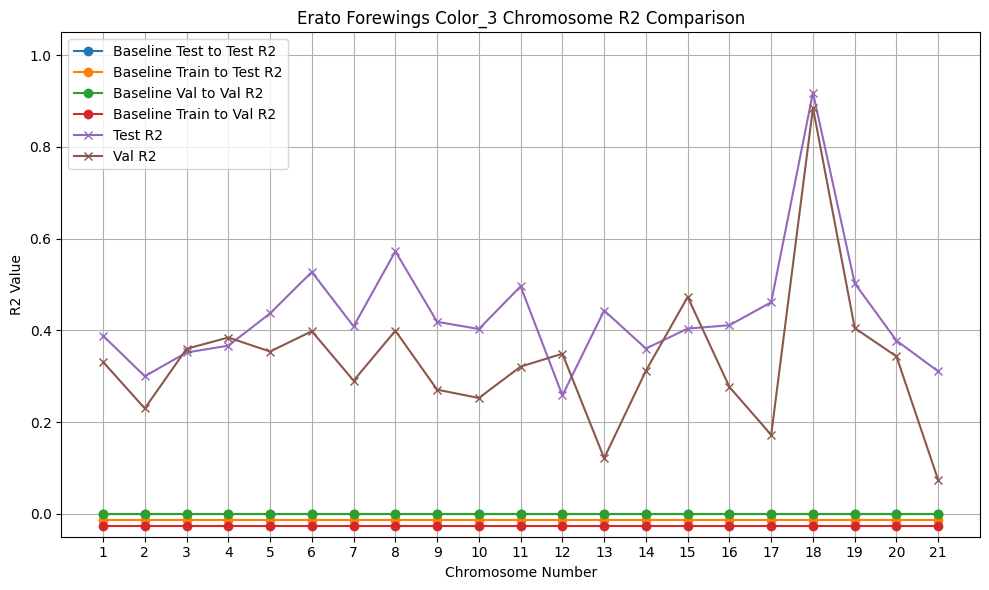

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 22), plot_data["baseline_test_to_test_r2"], label='Baseline Test to Test R2', marker='o')
plt.plot(range(1, 22), plot_data["baseline_train_to_test_r2"], label='Baseline Train to Test R2', marker='o')
plt.plot(range(1, 22), plot_data["baseline_val_to_val_r2"], label='Baseline Val to Val R2', marker='o')
plt.plot(range(1, 22), plot_data["baseline_train_to_val_r2"], label='Baseline Train to Val R2', marker='o')
plt.plot(range(1, 22), plot_data["test_r2"], label='Test R2', marker='x')
plt.plot(range(1, 22), plot_data["val_r2"], label='Val R2', marker='x')
plt.title(f'{species.capitalize()} {wing.capitalize()} {color.capitalize()} Chromosome R2 Comparison')
plt.xlabel('Chromosome Number')
plt.ylabel('R2 Value')
plt.ylim(-0.05, 1.05)
plt.xticks(range(1, 22))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()